In [1]:
import pandas as pd

C:\Users\rohit\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
data=pd.read_csv("cleaned_data.csv")

In [31]:
from sklearn.model_selection import train_test_split


features = data[['Calories','FatContent', 'SaturatedFatContent', 'CholesterolContent', 'SodiumContent', 'CarbohydrateContent', 'FiberContent', 'SugarContent', 'ProteinContent']]
labels = data[['Calories','FatContent', 'SaturatedFatContent', 'CholesterolContent', 'SodiumContent', 'CarbohydrateContent', 'FiberContent', 'SugarContent', 'ProteinContent']]

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)


print("Training set - Features:", X_train.shape, "Target:", y_train.shape)
print("Testing set - Features:", X_test.shape, "Target:", y_test.shape)

Training set - Features: (19609, 9) Target: (19609, 9)
Testing set - Features: (8405, 9) Target: (8405, 9)


# Long Short Term Memory

In [32]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_lstm = np.reshape(X_train_scaled, (X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_lstm = np.reshape(X_test_scaled, (X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

lstm_model = tf.keras.Sequential([
    tf.keras.layers.LSTM(50, activation='relu', input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])),
    tf.keras.layers.Dense(9)  
])

lstm_model.compile(optimizer='adam', loss='mse')

lstm_model.fit(X_train_lstm, y_train, epochs=15, batch_size=32, validation_data=(X_test_lstm, y_test), verbose=2)

lstm_predictions = lstm_model.predict(X_test_lstm)

def evaluate_lstm_model(predictions, y_true):
    lstm_mae = mean_absolute_error(y_true, predictions)
    lstm_mse = mean_squared_error(y_true, predictions)
    lstm_rmse = np.sqrt(lstm_mse)
    lstm_r2 = r2_score(y_true, predictions)

    print("LSTM Model Evaluation:")
    print(f'Mean Absolute Error: {lstm_mae}')
    print(f'Mean Squared Error: {lstm_mse}')
    print(f'Root Mean Squared Error: {lstm_rmse}')
    print(f'R-squared: {lstm_r2}')

evaluate_lstm_model(lstm_predictions, y_test)


Epoch 1/15
613/613 - 8s - loss: 3232421.5000 - val_loss: 155815.1562 - 8s/epoch - 12ms/step
Epoch 2/15
613/613 - 4s - loss: 3215186.0000 - val_loss: 145741.2969 - 4s/epoch - 7ms/step
Epoch 3/15
613/613 - 3s - loss: 3203317.2500 - val_loss: 135087.1250 - 3s/epoch - 5ms/step
Epoch 4/15
613/613 - 3s - loss: 3189288.5000 - val_loss: 123322.8438 - 3s/epoch - 5ms/step
Epoch 5/15
613/613 - 4s - loss: 3175992.0000 - val_loss: 112187.8828 - 4s/epoch - 6ms/step
Epoch 6/15
613/613 - 3s - loss: 3159909.7500 - val_loss: 101573.4609 - 3s/epoch - 5ms/step
Epoch 7/15
613/613 - 4s - loss: 3145389.5000 - val_loss: 94385.0703 - 4s/epoch - 6ms/step
Epoch 8/15
613/613 - 4s - loss: 3133623.0000 - val_loss: 89646.8984 - 4s/epoch - 6ms/step
Epoch 9/15
613/613 - 3s - loss: 3123483.7500 - val_loss: 86323.1562 - 3s/epoch - 5ms/step
Epoch 10/15
613/613 - 3s - loss: 3114363.0000 - val_loss: 83557.9609 - 3s/epoch - 5ms/step
Epoch 11/15
613/613 - 3s - loss: 3105446.2500 - val_loss: 81324.1641 - 3s/epoch - 5ms/step
E

In [37]:
lstm_mae = mean_absolute_error(y_test, lstm_predictions)
lstm_mse = mean_squared_error(y_test, lstm_predictions)
lstm_rmse = np.sqrt(lstm_mse)
lstm_r2 = r2_score(y_test, lstm_predictions)

print("LSTM Model Evaluation:")
print(f'Mean Absolute Error: {lstm_mae}')
print(f'Mean Squared Error: {lstm_mse}')
print(f'Root Mean Squared Error: {lstm_rmse}')
print(f'R-squared: {lstm_r2}')

LSTM Model Evaluation:
Mean Absolute Error: 44.26366748763638
Mean Squared Error: 73892.67522653242
Root Mean Squared Error: 271.8320717401323
R-squared: 0.611876164029892


In [33]:

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_rnn = np.reshape(X_train_scaled, (X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_rnn = np.reshape(X_test_scaled, (X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

rnn_model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(50, activation='relu', input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2])),
    tf.keras.layers.Dense(9)  
])

rnn_model.compile(optimizer='adam', loss='mse')

rnn_model.fit(X_train_rnn, y_train, epochs=10, batch_size=32, validation_data=(X_test_rnn, y_test), verbose=2)


rnn_predictions = rnn_model.predict(X_test_rnn)

def evaluate_rnn_model(predictions, y_true):
    rnn_mae = mean_absolute_error(y_true, predictions)
    rnn_mse = mean_squared_error(y_true, predictions)
    rnn_rmse = np.sqrt(rnn_mse)
    rnn_r2 = r2_score(y_true, predictions)

    print("RNN Model Evaluation:")
    print(f'Mean Absolute Error: {rnn_mae}')
    print(f'Mean Squared Error: {rnn_mse}')
    print(f'Root Mean Squared Error: {rnn_rmse}')
    print(f'R-squared: {rnn_r2}')

evaluate_rnn_model(rnn_predictions, y_test)


Epoch 1/10
613/613 - 7s - loss: 3231413.2500 - val_loss: 157501.1719 - 7s/epoch - 11ms/step
Epoch 2/10
613/613 - 4s - loss: 3220135.2500 - val_loss: 146918.2031 - 4s/epoch - 6ms/step
Epoch 3/10
613/613 - 3s - loss: 3207113.0000 - val_loss: 134385.5156 - 3s/epoch - 5ms/step
Epoch 4/10
613/613 - 3s - loss: 3192859.5000 - val_loss: 121865.6641 - 3s/epoch - 5ms/step
Epoch 5/10
613/613 - 3s - loss: 3178281.5000 - val_loss: 110700.8906 - 3s/epoch - 5ms/step
Epoch 6/10
613/613 - 3s - loss: 3165199.0000 - val_loss: 102060.9453 - 3s/epoch - 5ms/step
Epoch 7/10
613/613 - 3s - loss: 3152267.2500 - val_loss: 94712.0781 - 3s/epoch - 5ms/step
Epoch 8/10
613/613 - 3s - loss: 3141565.5000 - val_loss: 90423.4375 - 3s/epoch - 5ms/step
Epoch 9/10
613/613 - 3s - loss: 3131975.5000 - val_loss: 87550.8750 - 3s/epoch - 5ms/step
Epoch 10/10
613/613 - 3s - loss: 3123261.2500 - val_loss: 85208.0156 - 3s/epoch - 5ms/step
263/263 [==============================] - 1s 3ms/step
RNN Model Evaluation:
Mean Absolute E

In [38]:
rnn_mae = mean_absolute_error(y_test, rnn_predictions)
rnn_mse = mean_squared_error(y_test, rnn_predictions)
rnn_rmse = np.sqrt(rnn_mse)
rnn_r2 = r2_score(y_test, rnn_predictions)

print("RNN Model Evaluation:")
print(f'Mean Absolute Error: {rnn_mae}')
print(f'Mean Squared Error: {rnn_mse}')
print(f'Root Mean Squared Error: {rnn_rmse}')
print(f'R-squared: {rnn_r2}')

RNN Model Evaluation:
Mean Absolute Error: 53.06279010129002
Mean Squared Error: 85208.00885052948
Root Mean Squared Error: 291.9041089990504
R-squared: 0.42343230232653817


In [39]:
import matplotlib.pyplot as plt

models = ['LSTM', 'RNN']

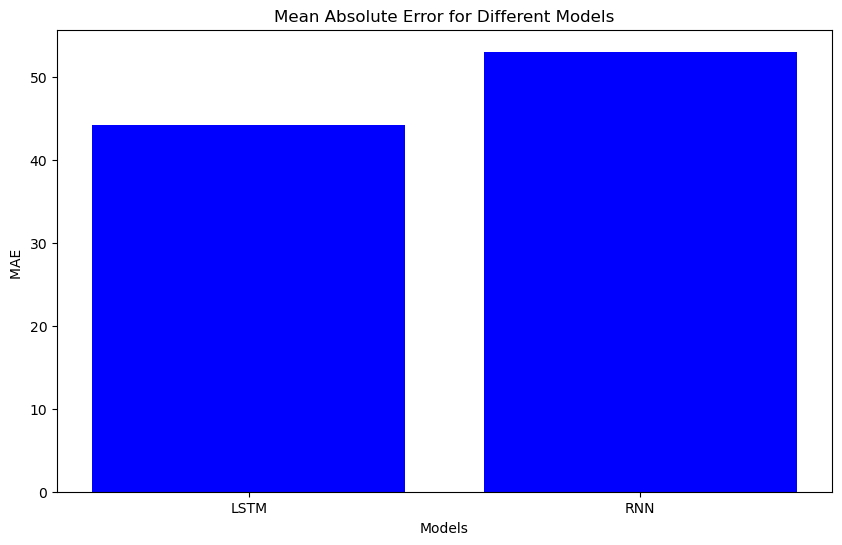

In [40]:
mae = [lstm_mae, rnn_mae]

plt.figure(figsize=(10, 6))
plt.bar(models, mae, color='blue')
plt.xlabel('Models')
plt.ylabel('MAE ')
plt.title('Mean Absolute Error for Different Models')
plt.show()

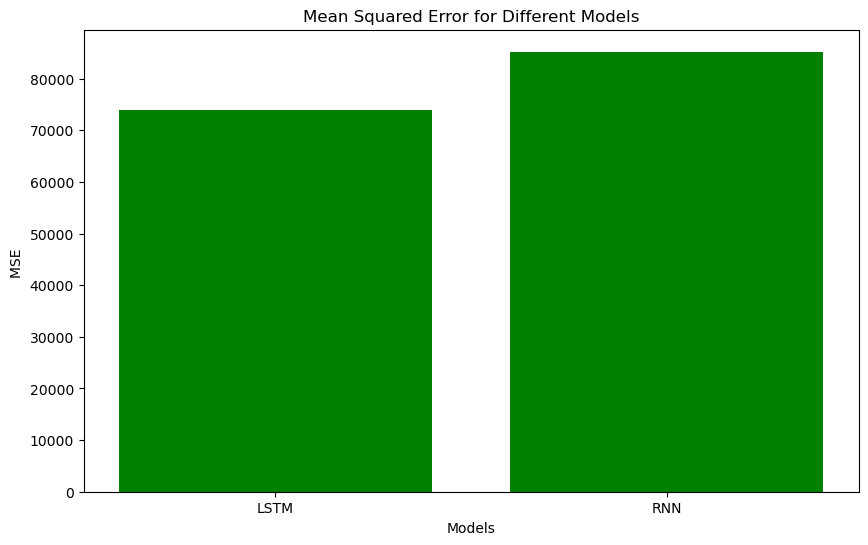

In [44]:
mse = [lstm_mse, rnn_mse]

plt.figure(figsize=(10, 6))
plt.bar(models, mse, color='green')
plt.xlabel('Models')
plt.ylabel('MSE ')
plt.title('Mean Squared Error for Different Models')
plt.show()

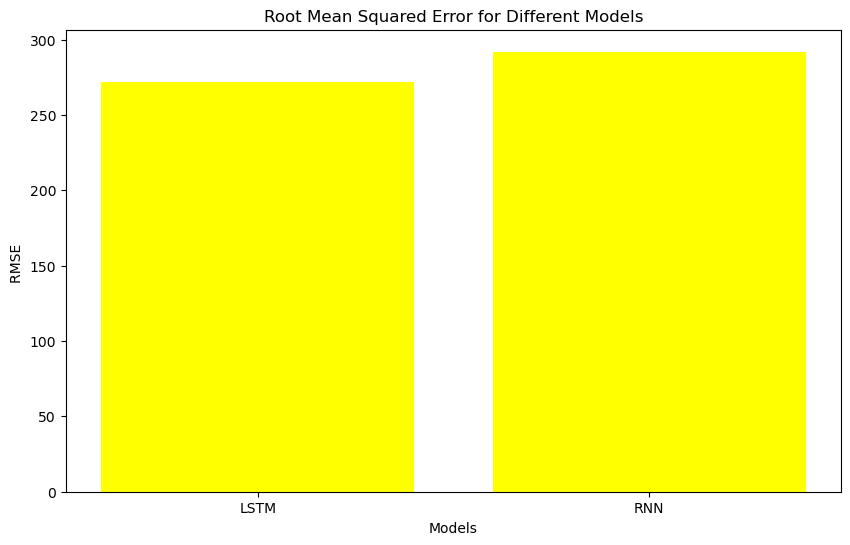

In [45]:
rmse = [lstm_rmse, rnn_rmse]

plt.figure(figsize=(10, 6))
plt.bar(models, rmse, color='yellow')
plt.xlabel('Models')
plt.ylabel('RMSE ')
plt.title('Root Mean Squared Error for Different Models')
plt.show()

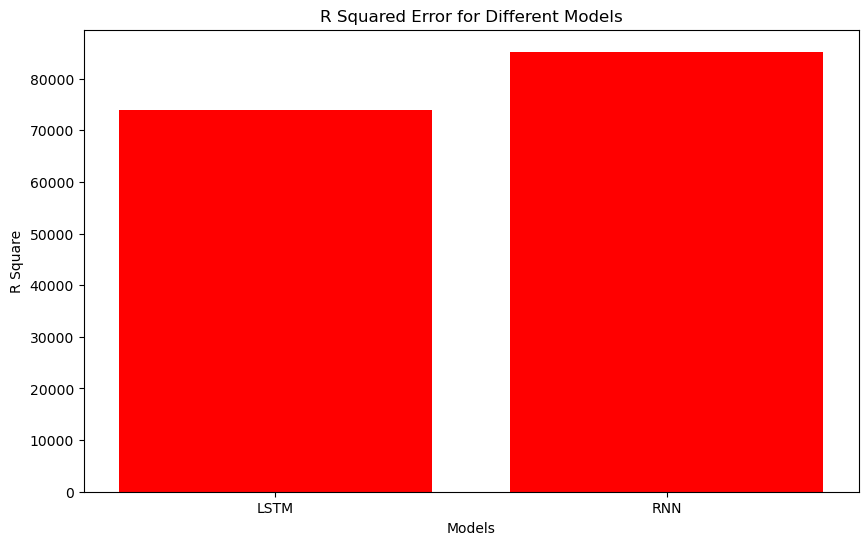

In [46]:
r2 = [lstm_r2, rnn_r2]

plt.figure(figsize=(10, 6))
plt.bar(models, mse, color='red')
plt.xlabel('Models')
plt.ylabel('R Square')
plt.title('R Squared Error for Different Models')
plt.show()